## Life Cycle of Machine Learning Project
- Understanding the Problem Statement
- Data Checks to Perform
- Exploratory Data Analysis
- Data Pre-Processing
- Model Training
- Choose Best Model

## this project to check the best ML model can be used to estimate the used car price 
- from sklearn.model_selection import train_test_split >>> *Split Data*
- from sklearn.linear_model import LinearRegression >>> *LinearRegression ML model*
- from sklearn.impute import SimpleImputer
- from sklearn.preprocessing import StandardScaler, OrdinalEncoder  >>> for scalar and ordinal encoder 
- from sklearn.compose import ColumnTransformer   >>> to merge categorical and numerical piplines 
- from sklearn.metrics import r2_score , mean_absolute_error , mean_absolute_percentage_error >>> *Check accuracy* 
- from sklearn.preprocessing import PolynomialFeatures  >>> *Use Plynomial reg , higher degree ML model*
- from sklearn.pipeline import Pipeline  >>> *Pipeline*
- from sklearn.model_selection import GridSearchCV >>> *to know which degree is better*
- from sklearn.linear_model import Ridge
- from sklearn.linear_model import Lasso
- from sklearn.linear_model import ElasticNet


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px

C:\Users\Mohamed Salah\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Read Data

In [2]:
df= pd.read_csv('UsedCar_train_data.csv')
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


## Check Data and EDA

In [3]:
df.describe() 

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [4]:
df.describe(include='O')

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,New_Price
count,6019,6019,6019,6019,6019,6017,5983,5983,824
unique,1876,11,5,2,4,442,146,372,540
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,95.13 Lakh
freq,49,790,3205,4299,4929,172,606,235,6


In [5]:
# Check the number of unique values of each column
df.nunique()

Unnamed: 0           6019
Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
New_Price             540
Price                1373
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [7]:
categorical_columns = ['Location','Fuel_Type','Transmission','Owner_Type','Power']

for col in categorical_columns:
    
    print(f"Category in {col} is : {df[col].unique()}")

Category in Location is : ['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
Category in Fuel_Type is : ['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
Category in Transmission is : ['Manual' 'Automatic']
Category in Owner_Type is : ['First' 'Second' 'Fourth & Above' 'Third']
Category in Power is : ['58.16 bhp' '126.2 bhp' '88.7 bhp' '88.76 bhp' '140.8 bhp' '55.2 bhp'
 '63.1 bhp' '171.5 bhp' '103.6 bhp' '74 bhp' '103.25 bhp' '116.3 bhp'
 '187.7 bhp' '115 bhp' '175.56 bhp' '98.6 bhp' '83.8 bhp' '167.62 bhp'
 '190 bhp' '88.5 bhp' '177.01 bhp' '80 bhp' '67.1 bhp' '102 bhp'
 '108.45 bhp' '138.1 bhp' '184 bhp' '179.5 bhp' '103.5 bhp' '64 bhp'
 '82 bhp' '254.8 bhp' '73.9 bhp' '46.3 bhp' '37.5 bhp' '77 bhp' '82.9 bhp'
 '149.92 bhp' '138.03 bhp' '112.2 bhp' '163.7 bhp' '71 bhp' '105 bhp'
 '174.33 bhp' '75 bhp' '103.2 bhp' '53.3 bhp' '78.9 bhp' '147.6 bhp'
 '147.8 bhp' '68 bhp' '186 bhp' '170 bhp' '69 bhp' '140 bhp' '78 bhp'
 '194 bhp' '5

Some features has missing values and need drop or imputation
lets check the %

In [8]:
df.isnull().sum() , df.isnull().mean()*100

(Unnamed: 0              0
 Name                    0
 Location                0
 Year                    0
 Kilometers_Driven       0
 Fuel_Type               0
 Transmission            0
 Owner_Type              0
 Mileage                 2
 Engine                 36
 Power                  36
 Seats                  42
 New_Price            5195
 Price                   0
 dtype: int64,
 Unnamed: 0            0.000000
 Name                  0.000000
 Location              0.000000
 Year                  0.000000
 Kilometers_Driven     0.000000
 Fuel_Type             0.000000
 Transmission          0.000000
 Owner_Type            0.000000
 Mileage               0.033228
 Engine                0.598106
 Power                 0.598106
 Seats                 0.697790
 New_Price            86.310018
 Price                 0.000000
 dtype: float64)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

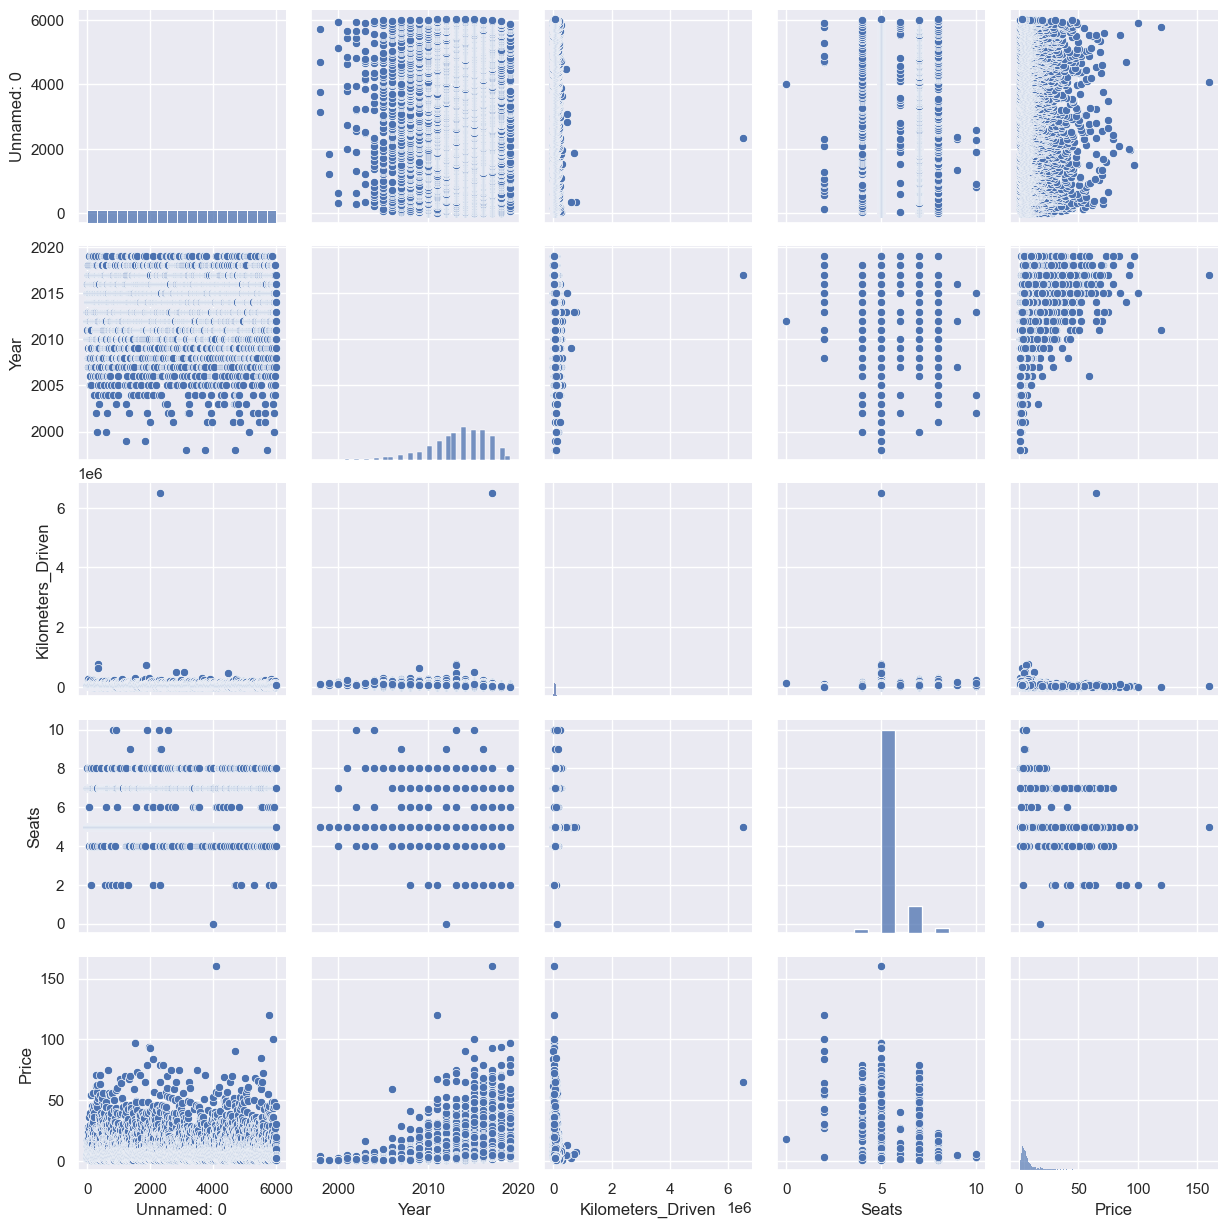

In [9]:
sns.pairplot(df)

In [10]:
df.corr(numeric_only=True)['Price'].apply(lambda x: abs(x)).sort_values(ascending=False)

Price                1.000000
Year                 0.305327
Seats                0.052225
Unnamed: 0           0.020275
Kilometers_Driven    0.011493
Name: Price, dtype: float64

but We have other categotical features that need also to be checked and analysied 

# Features Engineering

In [11]:
#Getting brand and model of car from name
df['Brand'] = df['Name'].map(lambda x : x.split(' ')[0])
df['Model'] = df['Name'].map(lambda x : x.split(' ')[1])

In [12]:
#Next we extract the numerical value from Engine and Power.
#Converting to string and extracting first value, then converting to float
df['Engine(cc)'] = df['Engine'].astype(str).map(lambda x : x.split(' ')[0]).replace('nan' , np.nan).astype(np.float64)
df['Power(bph)'] = df['Power'].astype(str).map(lambda x : x.split(' ')[0]).replace('null' , np.nan).astype(np.float64)

In [13]:
# since mileage has two units, to keep it consistent, we will convert the km/kg to km/l
def mileage_convert(x):
    if type(x) == str :
        if x.split()[-1] =='km/kg':
            return float(x.split()[0])*1.4 
        elif x.split()[-1] =='kmpl':
            return float(x.split()[0])
    else :
        return x 

In [14]:
# now we apply the conversion inside the df

df['Mileage(km/l)'] = df['Mileage'].apply(mileage_convert)

In [15]:
df.head(1)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Engine(cc),Power(bph),Mileage(km/l)
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,Wagon,998.0,58.16,37.24


In [16]:

df.nunique()

Unnamed: 0           6019
Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
New_Price             540
Price                1373
Brand                  31
Model                 212
Engine(cc)            146
Power(bph)            369
Mileage(km/l)         441
dtype: int64

In [17]:
df.corr(numeric_only=True)['Price'].apply(lambda x: abs(x)).sort_values(ascending=False)

Price                1.000000
Power(bph)           0.772566
Engine(cc)           0.658354
Year                 0.305327
Mileage(km/l)        0.300072
Seats                0.052225
Unnamed: 0           0.020275
Kilometers_Driven    0.011493
Name: Price, dtype: float64

## Outliers

In [18]:
# Change the float format
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price,Engine(cc),Power(bph),Mileage(km/l)
count,6019.00,6019.00,6019.00,5977.00,6019.00,5983.00,5876.00,6017.00
mean,3009.00,2013.36,58738.38,5.28,9.48,1621.28,113.25,18.24
std,1737.68,3.27,91268.84,0.81,11.19,601.36,53.87,4.88
min,0.00,1998.00,171.00,0.00,0.44,72.00,34.20,0.00
25%,1504.50,2011.00,34000.00,5.00,3.50,1198.00,75.00,15.26
50%,3009.00,2014.00,53000.00,5.00,5.64,1493.00,97.70,18.19
75%,4513.50,2016.00,73000.00,5.00,9.95,1984.00,138.10,21.10
max,6018.00,2019.00,6500000.00,10.00,160.00,5998.00,560.00,46.96


In [19]:
#sns.boxplot(x = df['Year'])
px.box(x = df['Year'], width= 600 , height= 200, labels={'x':'Years'})

In [20]:
px.box(x = df['Seats'], width= 600 , height= 200, labels={'x':'Seats'})

In [21]:
px.box(x = df['Price'], width= 600 , height= 200, labels={'x':'Prices'})

In [22]:
px.box(x = df['Kilometers_Driven'], width= 600 , height= 200, labels={'x':'Kilometers_Driven'})

`Some Strange Numbers`
* 'Kilometers_Driven' has max. of 6500000
* 'Seats' has min. of 0
* 'Price' has max. of 160.0 which is very far from 75% quartile of 9.95

`We will handle these outliers later`

`Let's check the distributions of the numerical features`

In [23]:
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price,Engine(cc),Power(bph),Mileage(km/l)
count,6019.00,6019.00,6019.00,5977.00,6019.00,5983.00,5876.00,6017.00
mean,3009.00,2013.36,58738.38,5.28,9.48,1621.28,113.25,18.24
std,1737.68,3.27,91268.84,0.81,11.19,601.36,53.87,4.88
min,0.00,1998.00,171.00,0.00,0.44,72.00,34.20,0.00
25%,1504.50,2011.00,34000.00,5.00,3.50,1198.00,75.00,15.26
50%,3009.00,2014.00,53000.00,5.00,5.64,1493.00,97.70,18.19
75%,4513.50,2016.00,73000.00,5.00,9.95,1984.00,138.10,21.10
max,6018.00,2019.00,6500000.00,10.00,160.00,5998.00,560.00,46.96


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a

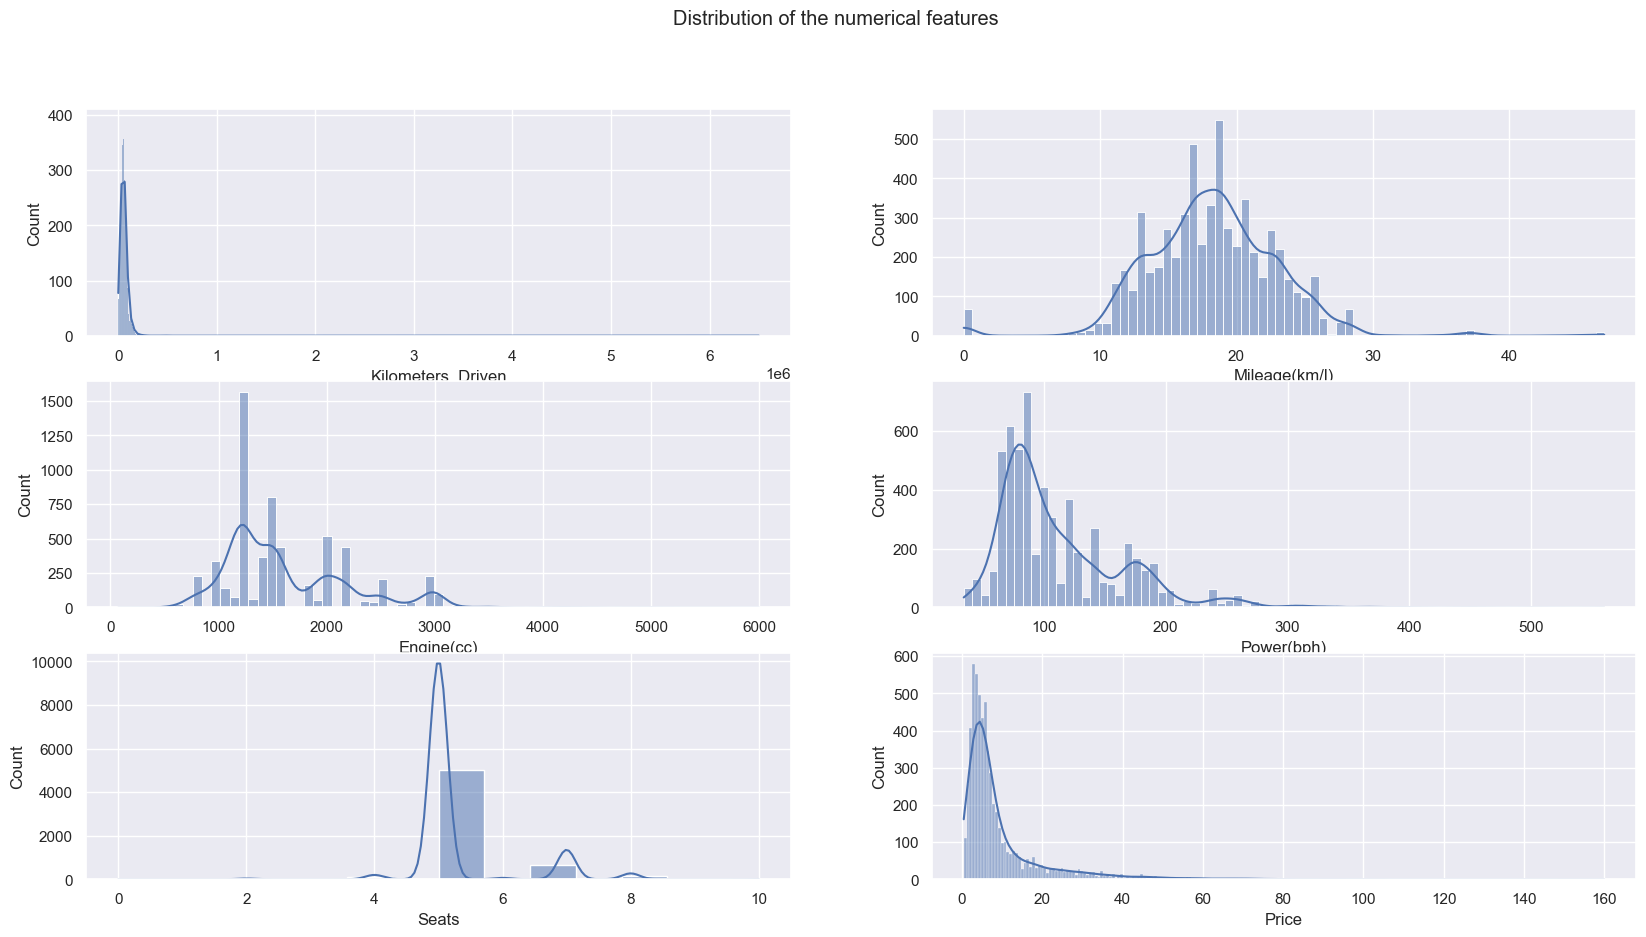

In [24]:
# Distribution of the numerical features
# make grid plot
fig, axes = plt.subplots(3, 2, figsize=(20, 10));
fig.suptitle('Distribution of the numerical features');
sns.histplot(ax=axes[0, 0], data=df, x='Kilometers_Driven', kde=True);
sns.histplot(ax=axes[0, 1], data=df, x='Mileage(km/l)', kde=True);
sns.histplot(ax=axes[1, 0], data=df, x='Engine(cc)', kde=True);
sns.histplot(ax=axes[1, 1], data=df, x='Power(bph)', kde=True);
sns.histplot(ax=axes[2, 0], data=df, x='Seats', kde=True);
sns.histplot(ax=axes[2, 1], data=df, x='Price', kde=True);

<Axes: xlabel='Price'>

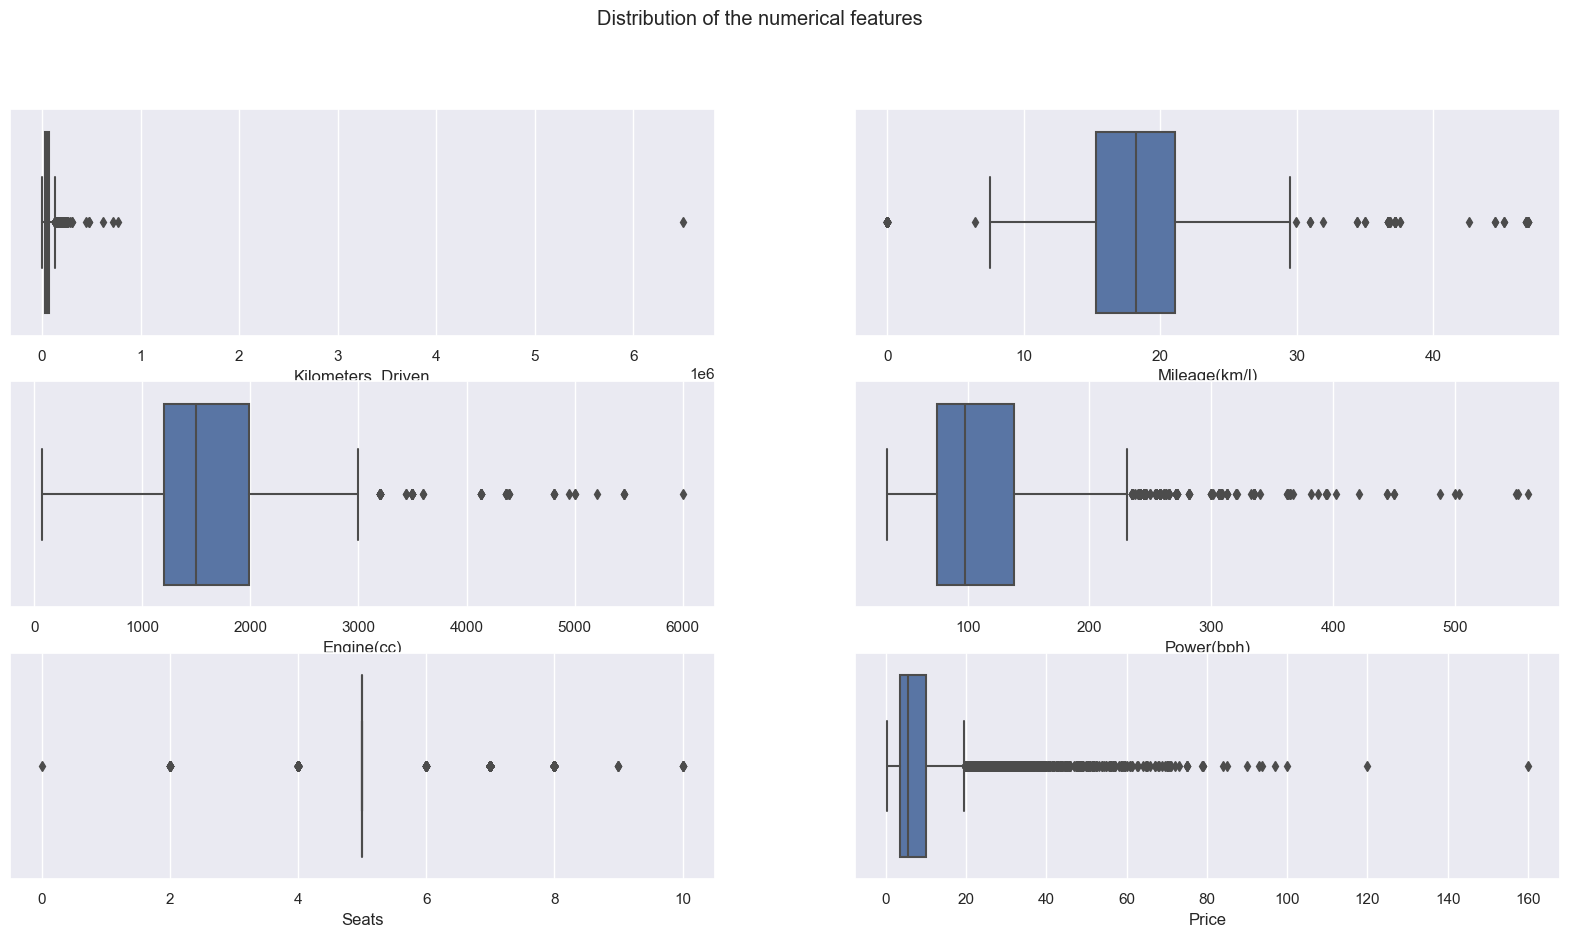

In [25]:
# Box plot for the numerical features
# make grid plot
fig, axes = plt.subplots(3, 2, figsize=(20, 10))
fig.suptitle('Distribution of the numerical features')
sns.boxplot(ax=axes[0, 0], data=df, x='Kilometers_Driven')
sns.boxplot(ax=axes[0, 1], data=df, x='Mileage(km/l)')
sns.boxplot(ax=axes[1, 0], data=df, x='Engine(cc)')
sns.boxplot(ax=axes[1, 1], data=df, x='Power(bph)')
sns.boxplot(ax=axes[2, 0], data=df, x='Seats')
sns.boxplot(ax=axes[2, 1], data=df, x='Price')


In [26]:
df.quantile([0, 0.1, 0.25,  0.9, 0.95, 0.99, 1], numeric_only=True)


,Unnamed: 0,Year,Kilometers_Driven,Seats,Price,Engine(cc),Power(bph),Mileage(km/l)
0.00,0.00,1998.00,171.00,0.00,0.44,72.00,34.20,0.00
0.10,601.80,2009.00,20000.00,5.00,2.30,1061.00,67.04,12.80
0.25,1504.50,2011.00,34000.00,5.00,3.50,1198.00,75.00,15.26
0.90,5416.20,2017.00,97000.00,7.00,22.50,2494.00,184.00,24.00
0.95,5717.10,2018.00,120000.00,7.00,32.45,2982.00,204.00,25.48
0.99,5957.82,2019.00,172829.00,8.00,56.00,3197.18,286.50,28.40
1.00,6018.00,2019.00,6500000.00,10.00,160.00,5998.00,560.00,46.96


`There are clear outliers in the 'Kilometer_Driven', 'Seats' , 'Mileage' and 'Price' columns. We will remove them Now.`

In [27]:
# take a copy from the data then remove the outliers
df_copy = df.copy()
df_copy = df_copy [df_copy['Kilometers_Driven'] < 6000000]
df_copy = df_copy [df_copy['Seats'] > 0]
df_copy = df_copy [df_copy['Mileage(km/l)'] > 0]
df_copy = df_copy [df_copy['Price'] < 100]

<Axes: xlabel='Price'>

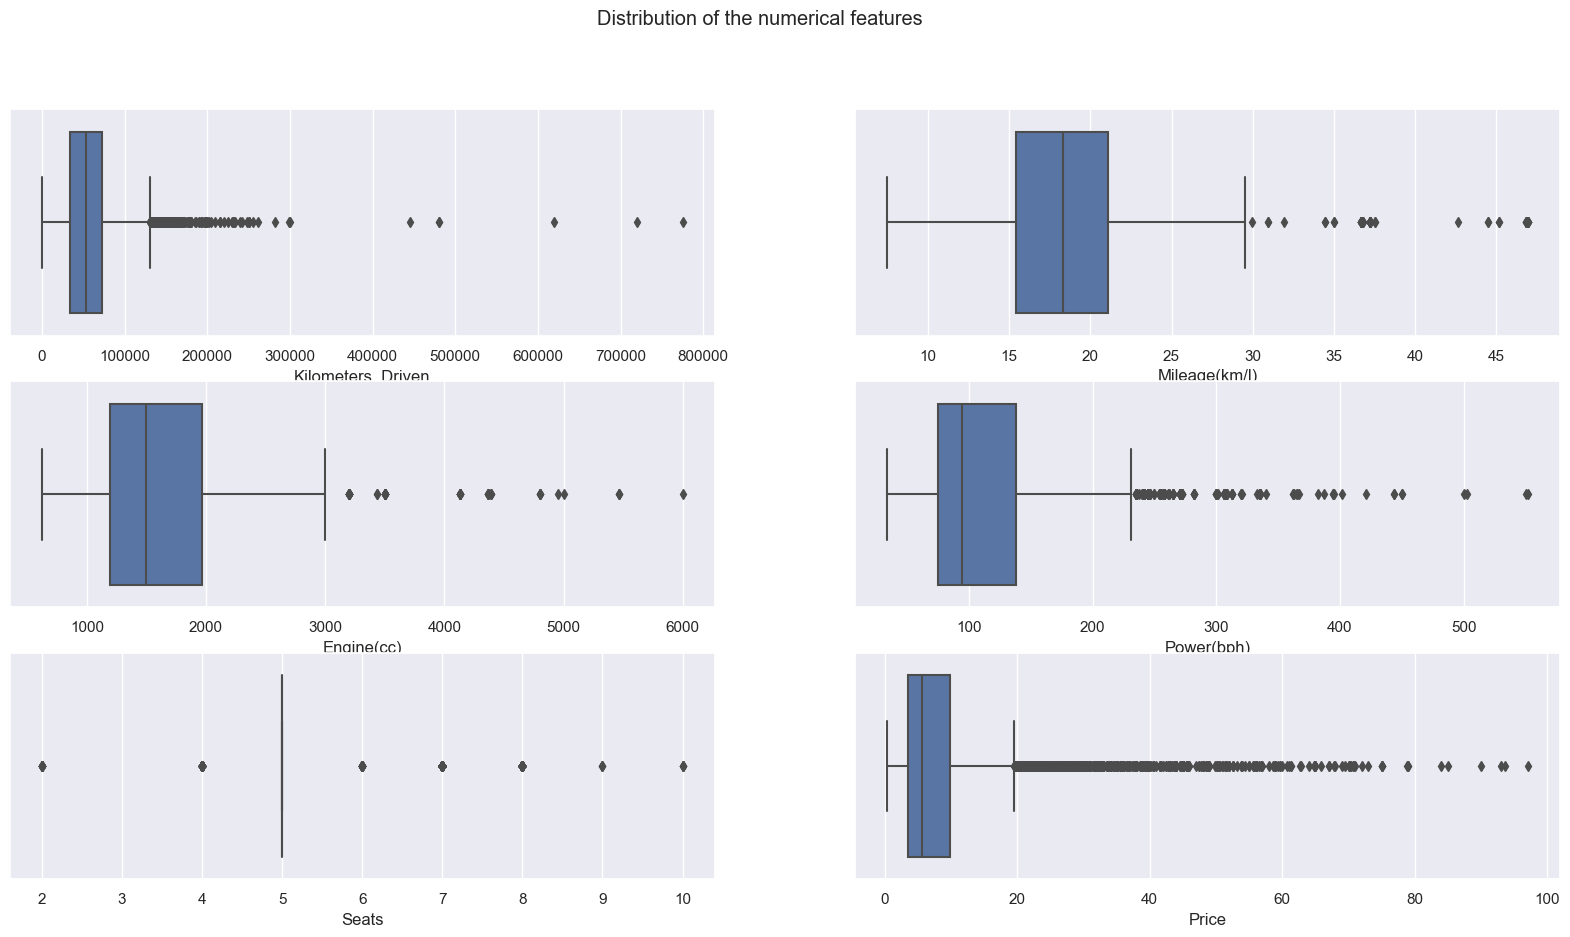

In [28]:
# make grid plot again to recheck outlier removal
fig, axes = plt.subplots(3, 2, figsize=(20, 10))
fig.suptitle('Distribution of the numerical features')
sns.boxplot(ax=axes[0, 0], data=df_copy, x='Kilometers_Driven')
sns.boxplot(ax=axes[0, 1], data=df_copy, x='Mileage(km/l)')
sns.boxplot(ax=axes[1, 0], data=df_copy, x='Engine(cc)')
sns.boxplot(ax=axes[1, 1], data=df_copy, x='Power(bph)')
sns.boxplot(ax=axes[2, 0], data=df_copy, x='Seats')
sns.boxplot(ax=axes[2, 1], data=df_copy, x='Price')

In [29]:
df_copy.quantile([0, 0.1, 0.25, 0.9, 0.95, 0.99, 1], numeric_only=True)

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price,Engine(cc),Power(bph),Mileage(km/l)
0.00,0.00,1998.00,171.00,2.00,0.44,624.00,34.20,7.50
0.10,602.30,2009.00,20000.00,5.00,2.37,1061.00,67.04,12.80
0.25,1508.25,2012.00,33900.25,5.00,3.50,1198.00,75.00,15.40
0.90,5416.70,2017.00,95998.50,7.00,22.00,2494.00,184.00,24.04
0.95,5715.35,2018.00,120000.00,7.00,32.00,2982.00,204.00,25.67
0.99,5956.87,2019.00,170000.00,8.00,55.97,2996.00,282.00,28.40
1.00,6018.00,2019.00,775000.00,10.00,97.07,5998.00,552.00,46.96


In [30]:
# Compare the two dataframes
print('Shape of the original dataframe: ', df.shape)
print('Shape of the new dataframe: ', df_copy.shape)
print('Percentage of data removed: {:.2f}%'.format((df.shape[0]-df_copy.shape[0])/df.shape[0]*100))
print(f'Percentage of data removed: {round(((df.shape[0]-df_copy.shape[0])/df.shape[0]*100),2)}%')

Shape of the original dataframe:  (6019, 19)
Shape of the new dataframe:  (5914, 19)
Percentage of data removed: 1.74%
Percentage of data removed: 1.74%


In [31]:
df_copy.corr(numeric_only=True)['Price'].apply(lambda x : abs(x)).sort_values(ascending=False)

Price               1.00
Power(bph)          0.78
Engine(cc)          0.66
Mileage(km/l)       0.33
Year                0.31
Kilometers_Driven   0.16
Seats               0.07
Unnamed: 0          0.03
Name: Price, dtype: float64

<Axes: >

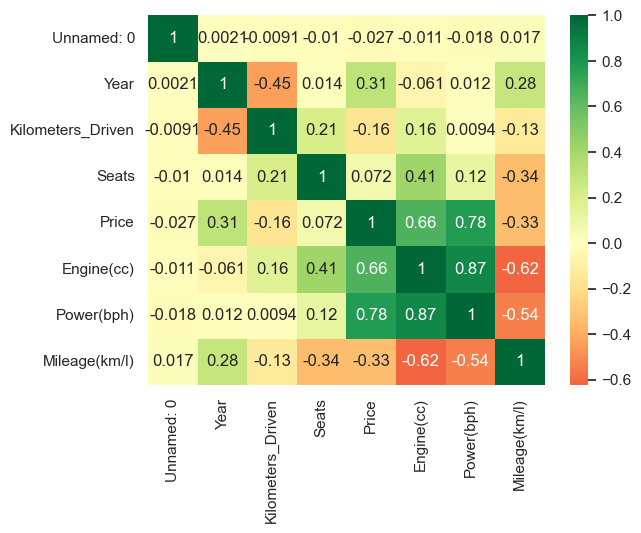

In [32]:
# Check the correlation between the numerical features
# Heatmap
sns.heatmap(df_copy.corr(numeric_only=True), annot=True, cmap='RdYlGn', center=0)

# Data Splitting for ML model

## this project to check the best ML model can be used to estimate the used car price 
- from sklearn.model_selection import train_test_split >>> *Split Data*
- from sklearn.linear_model import LinearRegression >>> *LinearRegression ML model*
- from sklearn.metrics import r2_score , mean_absolute_error , mean_absolute_percentage_error >>> *Check accuracy* 
- from sklearn.preprocessing import PolynomialFeatures  >>> *Use Plynomial reg , higher degree ML model*
- from sklearn.pipeline import Pipeline  >>> *Pipeline*
- from sklearn.model_selection import GridSearchCV >>> *to know which degree is better*
- from sklearn.linear_model import Ridge
- from sklearn.linear_model import Lasso
- from sklearn.linear_model import ElasticNet

In [33]:
df_copy.head(1)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Engine(cc),Power(bph),Mileage(km/l)
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00,NaN,1.75,Maruti,Wagon,998.00,58.16,37.24


In [34]:
x = df_copy[['Location', 'Year', 'Kilometers_Driven','Fuel_Type', 'Transmission', 'Owner_Type', 
       'Seats', 'Brand', 'Model', 'Engine(cc)','Power(bph)', 'Mileage(km/l)']] # Multi features 
y = df_copy[['Price']] # lable 

# lets split the data 
from sklearn.model_selection import train_test_split 
x_train , x_test , y_train , y_test = train_test_split(x,y,random_state=42, test_size=0.2)

In [35]:

# Splitting Columns
num_cols = ['Kilometers_Driven', 'Mileage(km/l)', 'Engine(cc)', 'Power(bph)', 'Seats', 'Year']
nom_cat_cols = ['Location', 'Fuel_Type', 'Transmission', 'Brand', 'Model']  
ord_cat_cols = ['Owner_Type'] 

In [36]:
from category_encoders import BinaryEncoder  ## has to be installed by "!pip install category_encoders"
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[ ('imputer', SimpleImputer(strategy='median')),
                                         ('scaler', StandardScaler())])
# Preprocessing for categorical data
nominal_categorical_transformer = Pipeline(steps=[('binary', BinaryEncoder())])
ordinal_categorical_transformer = Pipeline(steps=[('ordinal', OrdinalEncoder(categories=[['Fourth & Above', 'Third', 'Second', 'First']]))])
# The passed categories should not mix strings and numeric values, and should be sorted in case of numeric values.


# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(transformers=[('num_prep', numerical_transformer, num_cols),
                                                ('nom_prep', nominal_categorical_transformer, nom_cat_cols),
                                                ('ord_prep', ordinal_categorical_transformer, ord_cat_cols)])

X_train_preprocessed = preprocessor.fit_transform(x_train)
X_test_preprocessed = preprocessor.transform(x_test)

# LinearRegression

In [43]:
## apply the model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score , mean_absolute_error , mean_absolute_percentage_error
lin_reg.fit(X_train_preprocessed ,y_train )

# get the predected y 
y_predict= lin_reg.predict(X_test_preprocessed)

# calculate accuracy 
from sklearn.metrics import r2_score , mean_absolute_percentage_error
print('R2 score : ' , r2_score( y_test ,y_predict) )
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_predict)))
print('mean_absolute_percentage_error : ' , mean_absolute_percentage_error( y_test ,y_predict) )

R2 score :  0.7208295461503682
RMSE: 5.8869156618780005
mean_absolute_percentage_error :  0.6736377451504534


In [44]:
# Training Accuracy
print('Training Accuracy:', lin_reg.score(X_train_preprocessed, y_train))
y_train_pred = lin_reg.predict(X_train_preprocessed)
print('Training Accuracy:', r2_score(y_train, y_train_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_train, y_train_pred)))


Training Accuracy: 0.7329920607732637
Training Accuracy: 0.7329920607732637
RMSE: 5.539265975625348


# Polynomial Regression

In [45]:
## apply the model
from sklearn.preprocessing import PolynomialFeatures
Poly = PolynomialFeatures(degree=2)

X_train_poly = Poly.fit_transform(X_train_preprocessed)
X_test_poly = Poly.transform(X_test_preprocessed)

Poly_reg = LinearRegression()
Poly_reg.fit(X_train_poly, y_train)

# get the predected y 
y_test_poly_pre= Poly_reg.predict(X_test_poly)

# calculate Test accuracy 
from sklearn.metrics import r2_score , mean_absolute_error 

print('Training Accuracy', Poly_reg.score(X_train_poly, y_train))
print('Testing Accuracy', Poly_reg.score(X_test_poly, y_test))

Training Accuracy 0.9349679772273672
Testing Accuracy -4114742017954.6772


# # Ridge Regression

- from sklearn.linear_model import Ridge
- from sklearn.linear_model import Lasso
- from sklearn.linear_model import ElasticNet

In [46]:
from sklearn.linear_model import Ridge
ridge= Ridge()
ridge.fit(X_train_preprocessed,y_train)
# Predictions
y_test_rid_pred = ridge.predict(X_test_preprocessed)

# Model Evaluation
print('R2:', r2_score(y_test, y_test_rid_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_test_rid_pred)))
print('Training Accuracy', ridge.score(X_train_preprocessed,y_train))
print('Testing Accuracy', ridge.score(X_test_preprocessed, y_test))

R2: 0.7208494995720904
RMSE: 5.886705277490602
Training Accuracy 0.7329737760577908
Testing Accuracy 0.7208494995720904


In [47]:
for alpha in [0.01, 0.1, 1, 10, 100]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_preprocessed, y_train)
    y_test_rid_pred = ridge.predict(X_test_preprocessed)
    print('alpha:', alpha)
    print('R2:', r2_score(y_test, y_test_rid_pred))
    print('-----------------------------')

alpha: 0.01
R2: 0.7208299851679074
-----------------------------
alpha: 0.1
R2: 0.7208336541003084
-----------------------------
alpha: 1
R2: 0.7208494995720904
-----------------------------
alpha: 10
R2: 0.7206476112609581
-----------------------------
alpha: 100
R2: 0.7186546781206223
-----------------------------


# Lasso Regression

In [48]:
from sklearn.linear_model import Lasso
lasso= Lasso(alpha=1)
lasso.fit(X_train_preprocessed,y_train)
# Predictions
y_test_laso_pred = lasso.predict(X_test_preprocessed)

# Model Evaluation
print('R2:', r2_score(y_test, y_test_laso_pred))

print('RMSE:', np.sqrt(mean_squared_error(y_test, y_test_laso_pred)))
print('Training Accuracy', lasso.score(X_train_preprocessed,y_train))
print('Testing Accuracy', lasso.score(X_test_preprocessed, y_test))

R2: 0.6761475286541088
RMSE: 6.340546551966952
Training Accuracy 0.6675949410433102
Testing Accuracy 0.6761475286541088


# Ridge Regression with polynomial features

In [49]:
from sklearn.preprocessing import PolynomialFeatures
Poly = PolynomialFeatures(degree=2)
X_train_poly = Poly.fit_transform(X_train_preprocessed)
X_test_poly = Poly.transform(X_test_preprocessed)

from sklearn.linear_model import Ridge
ridge= Ridge(alpha=100)
ridge.fit(X_train_poly,y_train)
# Predictions
y_test_polyrid_pred = ridge.predict(X_test_poly)

# Model Evaluation
print('R2:', r2_score(y_test, y_test_polyrid_pred))

print('Training Accuracy', ridge.score(X_train_poly,y_train))
print('Testing Accuracy', ridge.score(X_test_poly, y_test))

R2: 0.8563114918271907
Training Accuracy 0.9219547257195674
Testing Accuracy 0.8563114918271907


# Ridge Regression with polynomial features in a pipeline

In [50]:
#polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

poly = make_pipeline(PolynomialFeatures(2), Ridge(alpha=100))
poly.fit(X_train_preprocessed, y_train)

# Predictions
y_pred = poly.predict(X_test_preprocessed)

# Model Evaluation
print('R2:', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', poly.score(X_test_preprocessed, y_test))

R2: 0.8563114918271907
RMSE: 4.223418379851714
R2: 0.8563114918271907


In [51]:
#try to find out best polynomial degree
for degree in [2,3,4] :
    poly = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=100))
    poly.fit(X_train_preprocessed, y_train)
    # Predictions
    y_pred = poly.predict(X_test_preprocessed)
    # Model Evaluation
    print(f'R2: @ Degree ={degree} >>>>>', r2_score(y_test, y_pred))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('****************')

R2: @ Degree =2 >>>>> 0.8563114918271907
RMSE: 4.223418379851714
****************
R2: @ Degree =3 >>>>> 0.8490045956398842
RMSE: 4.329472170999394
****************
R2: @ Degree =4 >>>>> 0.6876821032943798
RMSE: 6.226607971609566
****************


# Try the impact of log transformation on the ML score 

In [52]:
# Log Transform for the target (y_train and y_test only )
def log_transform(x):
    return np.log1p(x)

# Log Transform for orginal data just after splitting 
y_train_log = log_transform(y_train)
y_test_log = log_transform(y_test)

In [53]:
new_df = pd.concat([y_train_log, y_train], axis=1) # This will combine y_train_log and y_train into a new DataFrame, new_df
new_df.columns = ['Price_log', 'Price'] # To rename the columns
new_df.describe() # to Compare statically the imapct of Log 

,Price_log,Price
count,4731.00,4731.00
mean,2.02,9.41
std,0.74,10.72
min,0.36,0.44
25%,1.50,3.50
50%,1.89,5.65
75%,2.38,9.80
max,4.59,97.07


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



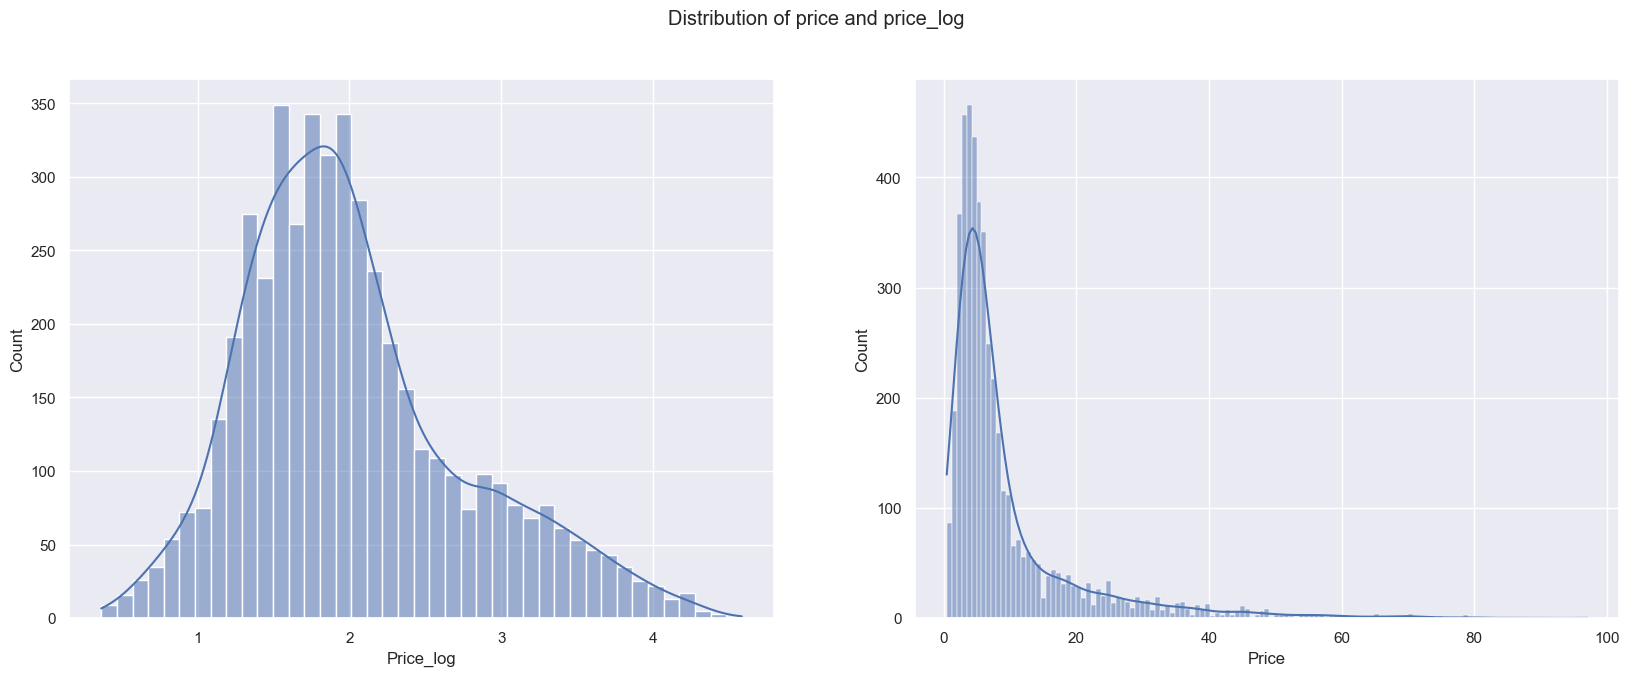

In [54]:
# Distribution of the numerical features
# make grid plot
fig, axes = plt.subplots(1, 2, figsize=(20, 7));
fig.suptitle('Distribution of price and price_log ');
sns.histplot(ax=axes[0], data=new_df, x='Price_log', kde=True);
sns.histplot(ax=axes[1], data=new_df, x='Price', kde=True);

In [55]:
## apply the model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
from sklearn.metrics import r2_score , mean_absolute_error , mean_absolute_percentage_error
lin_reg.fit(X_train_preprocessed ,y_train_log )
# x_train , x_test , y_train , y_test 
# get the predected y 
y_pred= lin_reg.predict(X_test_preprocessed)

# calculate accuracy 
from sklearn.metrics import r2_score , mean_absolute_percentage_error
print('R2 score : ' , r2_score( y_test_log ,y_predict) )
print('R2 Training score : ' , lin_reg.score( X_train_preprocessed ,y_train_log  ) )
print('R2 Testing score : ' , lin_reg.score( X_test_preprocessed ,y_test_log ) )
#print('Training RMSE:', np.sqrt(mean_squared_error(y_train_log, y_pred)))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test_log, y_pred)))


R2 score :  -231.3412938996487
R2 Training score :  0.890698168863915
R2 Testing score :  0.8840905475043763
Testing RMSE: 0.2533145652537974


# `Log Transformation of the target variable affects the model performance positively`

In [56]:
poly_ridge = make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=100))
poly_ridge.fit(X_train_preprocessed ,y_train_log)
y_test_polyrid_log = poly_ridge.predict(X_test_preprocessed)


print('R2 Training score : ' , poly_ridge.score( X_train_preprocessed ,y_train_log  ) )
print('R2 Testing score : ' , poly_ridge.score( X_test_preprocessed ,y_test_log ) )
#print('Training RMSE:', np.sqrt(mean_squared_error(y_train_log, y_test_polyrid_log)))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test_log, poly_ridge.predict(X_test_preprocessed))))

R2 Training score :  0.9500263946320334
R2 Testing score :  0.9233044440443438
Testing RMSE: 0.20605627028428058


In [57]:
# Try Gradient Descent

from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(random_state=0, max_iter=10000, tol=1e-3, penalty='l2', alpha=10, eta0=0.01)
poly_sgd = make_pipeline(PolynomialFeatures(2), sgd)

poly_sgd.fit(X_train_preprocessed, y_train_log)

# Predictions
y_pred = poly_sgd.predict(X_test_preprocessed)

# Model Evaluation
print('Training Accuracy:', poly_sgd.score(X_train_preprocessed, y_train_log))
print('Testing Accuracy:', poly_sgd.score(X_test_preprocessed, y_test_log))
print('Training RMSE:', np.sqrt(mean_squared_error(y_train_log, poly_sgd.predict(X_train_preprocessed))))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test_log, y_pred)))

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Training Accuracy: 0.7386427138902346
Testing Accuracy: 0.725585719251041
Training RMSE: 0.37719804609624924
Testing RMSE: 0.389766122828414


# `poly_ridge  is the best model we got.till Now  `

In [58]:
# Access the coefficients in the pipeline
print('Intercept:', poly_ridge.named_steps['ridge'].intercept_)
print('Coefficients:', poly_ridge.named_steps['ridge'].coef_)

Intercept: [1.92215613]
Coefficients: [[ 0.         -0.03882537 -0.01010391  0.04090365  0.09047637  0.0012146
   0.06946865  0.00818455 -0.00325791 -0.02060017  0.01195304 -0.00285597
  -0.01818704  0.01704647  0.02806495 -0.02806495  0.00686826  0.00442258
   0.01796001 -0.01054948  0.00222483 -0.00274221 -0.00241292 -0.00192117
   0.01149463 -0.00333333 -0.00292547  0.0005158   0.00210325  0.01403749
   0.00423503 -0.008268   -0.00380266 -0.02154281  0.01434235 -0.00456869
   0.00431718 -0.00097846  0.01072384 -0.01875901 -0.000805   -0.01538917
  -0.01706879 -0.02443643 -0.01438894  0.00147781  0.0130402   0.005113
  -0.00371442  0.00705692 -0.01522619 -0.01328509 -0.01584499  0.00430998
   0.00665056 -0.00590298 -0.00865967 -0.00787708  0.00486685 -0.00272588
   0.02658041  0.00896506  0.00907068 -0.02585686  0.00915895 -0.00857634
  -0.00578821  0.00407255 -0.00519273 -0.00397217  0.0280631  -0.0193321
   0.00922819 -0.00076837 -0.05241425 -0.04115567  0.04844243 -0.0360639
   0.

In [59]:
# Access the features names in the pipeline
preprocessor.transformers_[1][1].named_steps['binary'].get_feature_names()

C:\Users\Mohamed Salah\AppData\Roaming\Python\Python311\site-packages\category_encoders\utils.py:379: FutureWarning:

`get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.



array(['Location_0', 'Location_1', 'Location_2', 'Location_3',
       'Fuel_Type_0', 'Fuel_Type_1', 'Fuel_Type_2', 'Transmission_0',
       'Transmission_1', 'Brand_0', 'Brand_1', 'Brand_2', 'Brand_3',
       'Brand_4', 'Model_0', 'Model_1', 'Model_2', 'Model_3', 'Model_4',
       'Model_5', 'Model_6', 'Model_7'], dtype=object)

# Saving Model and Preprocessor

In [60]:
# Preprocessor Saving
import pickle
pickle.dump(preprocessor, open('preprocessor.pkl', 'wb'))

# Model Saving
pickle.dump(poly_ridge, open('model.pkl', 'wb'))

In [61]:
# Load Preprocessor/Model
preprocessor = pickle.load(open('preprocessor.pkl', 'rb'))
model = pickle.load(open('model.pkl', 'rb'))

# `Lets do a simple test and check the model`

In [62]:
# Preprocessing on selected data from the x_test
new_data = x_test.sample(1)
new_data

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Brand,Model,Engine(cc),Power(bph),Mileage(km/l)
5257,Kolkata,2016,146000,Petrol,Manual,Second,5.00,Hyundai,Xcent,1197.00,82.00,19.10


In [63]:
y_test.loc[new_data.index]

,Price
5257,3.50


In [64]:
# Preprocessing & Prediction
new_data_preprocessed = preprocessor.transform(new_data)
log_price = model.predict(new_data_preprocessed) # in log scale
price = np.expm1(log_price) # in original scale

print('Price:', price[0])

Price: [3.45085528]


# Now lets convert 'INR' to 'USD'
`Where USD is the base currency you want to use`

In [67]:
# API for Currency Conversion
import requests
response = requests.get('https://api.exchangerate-api.com/v4/latest/INR')
response.json()

{'provider': 'https://www.exchangerate-api.com',
 'WARNING_UPGRADE_TO_V6': 'https://www.exchangerate-api.com/docs/free',
 'terms': 'https://www.exchangerate-api.com/terms',
 'base': 'INR',
 'date': '2024-10-28',
 'time_last_updated': 1730073602,
 'rates': {'INR': 1,
  'AED': 0.0436,
  'AFN': 0.788,
  'ALL': 1.08,
  'AMD': 4.61,
  'ANG': 0.0213,
  'AOA': 10.94,
  'ARS': 11.74,
  'AUD': 0.018,
  'AWG': 0.0213,
  'AZN': 0.0202,
  'BAM': 0.0215,
  'BBD': 0.0238,
  'BDT': 1.42,
  'BGN': 0.0215,
  'BHD': 0.00447,
  'BIF': 34.7,
  'BMD': 0.0119,
  'BND': 0.0157,
  'BOB': 0.0821,
  'BRL': 0.0675,
  'BSD': 0.0119,
  'BTN': 1,
  'BWP': 0.159,
  'BYN': 0.0389,
  'BZD': 0.0238,
  'CAD': 0.0165,
  'CDF': 33.73,
  'CHF': 0.0103,
  'CLP': 11.27,
  'CNY': 0.0847,
  'COP': 51.22,
  'CRC': 6.13,
  'CUP': 0.285,
  'CVE': 1.21,
  'CZK': 0.277,
  'DJF': 2.11,
  'DKK': 0.0821,
  'DOP': 0.715,
  'DZD': 1.59,
  'EGP': 0.58,
  'ERN': 0.178,
  'ETB': 1.43,
  'EUR': 0.011,
  'FJD': 0.0267,
  'FKP': 0.00917,
  'F

In [69]:
# from INR to USD
inr_to_usd = response.json()['rates']['USD']
inr_to_usd

# from Lakh to USD
lakh_to_usd = inr_to_usd*100000  ## the unit of Data prices colum
lakh_to_usd

1190.0

In [75]:
price[0][0]

3.450855276918233

In [76]:
# From Lakhs to USD
Price_USD = price[0][0]* lakh_to_usd
print('Price in USD:', Price_USD)

Price in USD: 4106.517779532697


In [79]:
df_copy.to_csv('df_copy.csv')

In [ ]:
# Extract Data for Deployment stramlit app 
# Create lists include uninque values of each categorical feature
Fuel_Type
Transmission
Owner_Type
Location
Brand
Model

In [77]:
df_copy.head(1)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Engine(cc),Power(bph),Mileage(km/l)
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00,NaN,1.75,Maruti,Wagon,998.00,58.16,37.24


In [94]:
# Extract Data for Deployment stramlit app 
# Create lists/dictionary include uninque values of each categorical feature

locations = df_copy.Location.unique().tolist()
years = df_copy.Year.unique().tolist()
Owner_Type = df_copy.Owner_Type.unique().tolist()
Min_Mileage, Max_Mileage = df_copy["Mileage(km/l)"].min(), df_copy["Mileage(km/l)"].max()
Min_Engine, Max_Engine = df_copy["Engine(cc)"].min(), df_copy["Engine(cc)"].max()
Min_Power, Max_Power = df_copy["Power(bph)"].min(), df_copy["Power(bph)"].max()

# Models for every brand
# creates a dictionary called brands where each unique car brand from df_copy is a key,
# and the corresponding value is a list of unique models for that brand.

brands = {}         # key: brand, value: list of models
for brand in df_copy.Brand.unique().tolist():
    brands[brand] = df_copy[df_copy.Brand == brand].Model.unique().tolist()
# Seats for every model
seats = {}          # key: model, value: list of seats
for model in df_copy.Model.unique().tolist():
    seats[model] = df_copy[df_copy.Model == model].Seats.unique().tolist()

# Transmissions
transmissions = {}
for model in df_copy.Model.unique().tolist():
    transmissions[model] = df_copy[df_copy.Model == model].Transmission.unique().tolist()

# Fuel Types
fuel_types = {}
for model in df_copy.Model.unique().tolist():
    fuel_types[model] = df_copy[df_copy.Model == model].Fuel_Type.unique().tolist()

# Save the data
data = {'locations': locations,
        'years': years,
        'fuel_types': fuel_types,
        'transmissions': transmissions,
        'brands': brands,
        'Owner_Type': Owner_Type,
        'Min_Mileage': Min_Mileage,
        'Max_Mileage': Max_Mileage,
        'Min_Engine': Min_Engine,
        'Max_Engine': Max_Engine,
        'Min_Power': Min_Power,
        'Max_Power': Max_Power,
        'seats': seats,
        'lakh_to_usd': lakh_to_usd
        }

pickle.dump(data, open('data_for_deploy.pkl', 'wb'))

In [91]:
df_copy.head(1)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Engine(cc),Power(bph),Mileage(km/l)
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00,NaN,1.75,Maruti,Wagon,998.00,58.16,37.24


# Streamlit App

In [10]:
%%writefile Cars_Price_Prediction_app.py

import streamlit as st
import pandas as pd
import numpy as np
import pickle

st.title('Used Cars Price Prediction')

# Load Data for Deployment
data = pickle.load(open('data_for_deploy.pkl', 'rb'))

# Input Data
car_brand = st.selectbox('Brand', data['brands'].keys())
car_model = st.selectbox('Model', data['brands'][car_brand])
fuel_type = st.selectbox('Fuel Type', data['fuel_types'][car_model])
transmission = st.selectbox('Transmission', data['transmissions'][car_model])
seats = st.selectbox('Seats', data['seats'][car_model])

location = st.selectbox('Location', data['locations'])
year = st.selectbox('Year', range(min(data['years']), max(data['years'])+1))
km_driven = st.slider('Kilometers Driven', min_value= 10, max_value=500000, step=1)

owner_type = st.selectbox('Owner Type', data['Owner_Type'])

mileage = st.number_input('Mileage', min_value=data['Min_Mileage'], max_value=data['Max_Mileage'])
engine = st.number_input('Engine', min_value=data['Min_Engine'], max_value=data['Max_Engine'])
power = st.number_input('Power', min_value=data['Min_Power'], max_value=data['Max_Power'])

new_data = pd.DataFrame({'Location': location,
                         'Year': year,
                         'Kilometers_Driven': km_driven,
                         'Fuel_Type': fuel_type,
                         'Transmission': transmission,
                         'Owner_Type': owner_type,
                         'Mileage(km/l)': mileage,
                         'Engine(cc)': engine,
                         'Power(bph)': power,
                         'Seats': seats,
                         'Brand': car_brand,
                         'Model': car_model}, index=[0])

# Preprocessing
preprocessor = pickle.load(open('preprocessor.pkl', 'rb'))
new_data_preprocessed = preprocessor.transform(new_data)


# Prediction
model = pickle.load(open('model.pkl', 'rb'))
log_price = model.predict(new_data_preprocessed) # in log scale
price = np.expm1(log_price) # in original scale

# From Lakhs to USD
price_usd = price[0][0] * data['lakh_to_usd']

# Output
if st.button('Predict'):
    st.header('Predicted Price')
    st.markdown('**Price in USD**: $' + str(round(price_usd, 2)))
    st.markdown('**Price in lakh**: ' + str(round(price[0][0], 2)))

Overwriting Cars_Price_Prediction_app.py


# To RUN the web app from cmd terminal 
  ### python -m streamlit run Cars_Price_Prediction_app.py 

In [11]:
!python -m streamlit run Cars_Price_Prediction_app.py

^C
